# Проект: Оценить результаты A/B теста на пользователях интернет-магазина

# Описание проекта

Учебный проект в Яндекс.Практикуме. Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Нужно приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

# Описание данных

Файл /datasets/hypothesis.csv

* 		Hypothesis — краткое описание гипотезы;
* 		Reach — охват пользователей по 10-балльной шкале;
* 		Impact — влияние на пользователей по 10-балльной шкале;
* 		Confidence — уверенность в гипотезе по 10-балльной шкале;
* 		Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv

* 		transactionId — идентификатор заказа;
* 		visitorId — идентификатор пользователя, совершившего заказ;
* 		date — дата, когда был совершён заказ;
* 		revenue — выручка заказа;
* 		group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv
* 		date — дата;
* 		group — группа A/B-теста;
* 		visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
dfh = pd.read_csv('/datasets/hypothesis.csv')
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


У нас есть  данные о 9 гипотезах о способах увеличения выручки. Проранжируем их  методами RICE и ICE.

In [ ]:
dfh.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Для начала проранжируем гипотезы методом ICE.

In [ ]:
dfh['ICE'] = round((dfh['Impact'] * dfh['Confidence']) / dfh['Efforts'], 1)
pd.options.display.max_colwidth = int(dfh['Hypothesis'].str.len().max()) + 1
dfh.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


Приоритетные гипотезы по методу RICE - 7 и 2. Cамая приоритетная: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### Выводы:

Наиболее приоритетные гипотезы по методу ICE:

* Запустить акцию, дающую скидку на товар в день рождения
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Наиболее приоритетные гипотезы по методу RICE:

* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Почему различаются приоритетные гипотезы по двум методам? Охват скидочной акции на день рождения будет небольшим, поэтому эта гипотеза не получила большой оценки по методу RICE. Странно, что гипотезе про добавление блоков рекомендаций для повышения конверсии и среднего чека дали такую низкую оценку по Impact и она не вошла в топ гипотез по методу ICE.

# Анализ A/B-теста

## Первый взгляд на данные и предобработка

In [ ]:
orders = pd.read_csv('/datasets/orders.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


У нас есть данные о 1197 заказах. Пропущенных значений нет.

In [ ]:
orders.duplicated().sum()

0

В данных нет дубликатов

In [ ]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В этом датасете должны быть данные о посетителях. В датасете нет пропущенных значений.

In [ ]:
visitors.duplicated().sum()

0

В датасете нет дубликатов.

In [ ]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [ ]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Как видим, в датасете указано количество посетителей сайта по месяцам и тестовой группе.

In [ ]:
visitors_with_number_of_groups = orders.groupby('visitorId').agg({'group': pd.Series.nunique})
visitors_with_number_of_groups[visitors_with_number_of_groups['group'] == 2].count()

group    58
dtype: int64

58 пользователей попали в две разные группы в тесте. Нужно сообщить разработчикам, чтобы поправили систему распределения пользователей по группам.

## Построим графики по основным показателям A/B теста

### Построим график кумулятивной выручки по группам

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

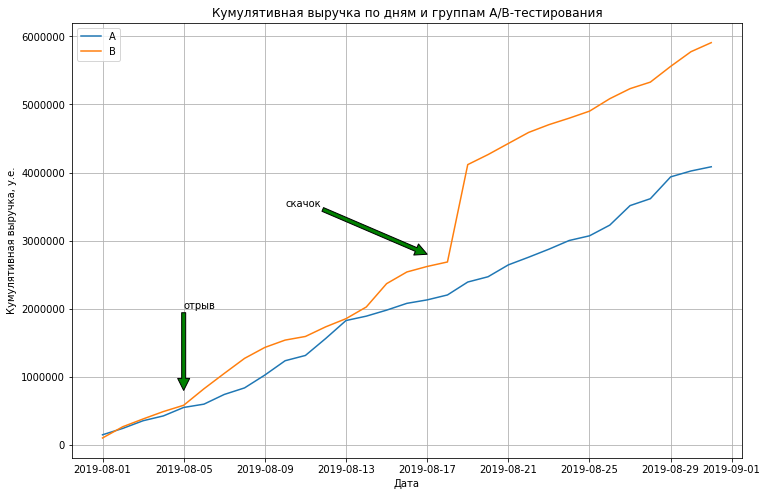

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.rcParams["figure.figsize"] = (12,8)

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')

plt.xlabel('Дата')

plt.ylabel('Кумулятивная выручка, у.е.')

plt.grid()

plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))

plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g'))

plt.legend();

Кумулятивная выручка пользователей из группы B после 13-го августа стабильно выше. А после 18-го - значительно и стабильно превышает выручку пользователей из группы A. Резкий рост разницы в кумулятивной выручки после 18-го августа может быть обусловлен и всплеском числа заказов, и появлением очень дорогих заказов. Выбросы проанализируем чуть позже. 

### Построим график кумулятивного среднего чека по группам

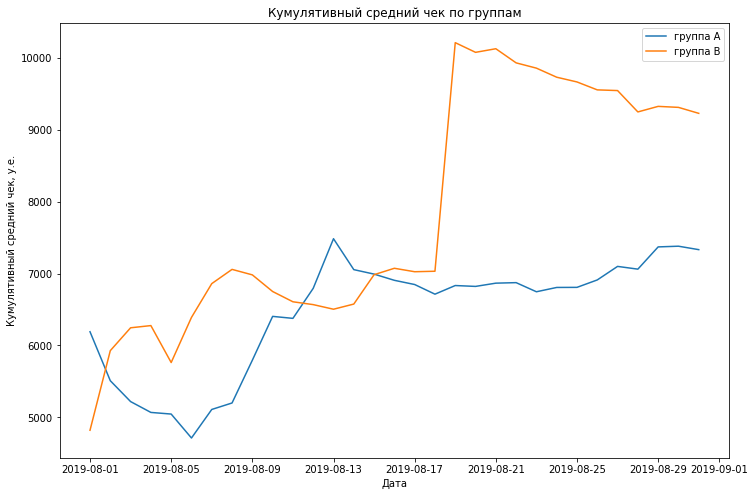

In [ ]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек, у.е.')
plt.legend();

Мы видим резкий скачок кумулятивного среднего чека у группы B 18-го августа. Позже он несколько снижается, тогда как у группы А - повышается. По всей видимости, тогда был один или несколько крупных заказов у группы В.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

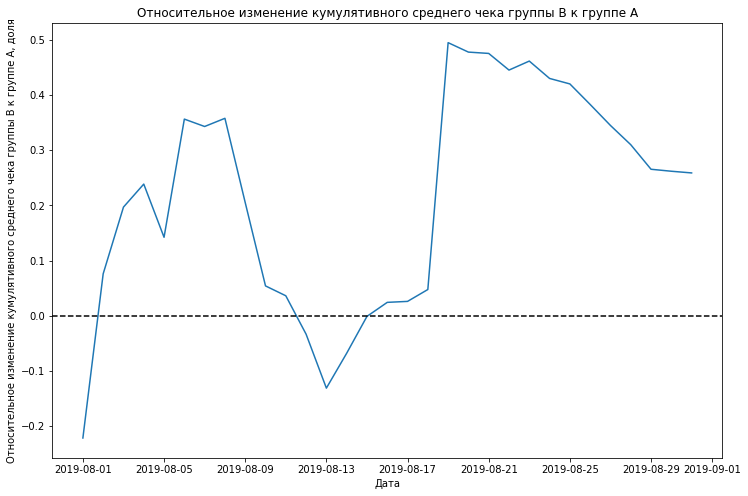

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кумулятивного среднего чека группы В к группе А, доля')

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

График во многих местах резко меняет значения - то в одну, то в другую сторону. Видимо, дорогие заказы сильно влияют на статистику.

### Построим график кумулятивной конверсии по группам

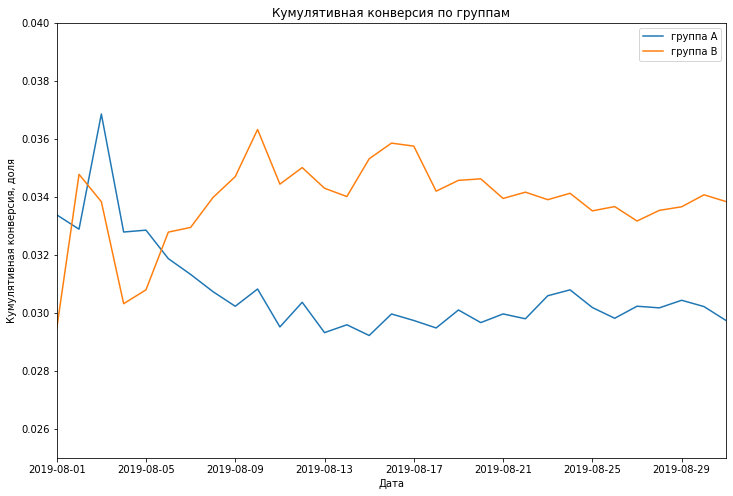

In [ ]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.title('Кумулятивная конверсия по группам')

plt.xlabel('Дата')

plt.ylabel('Кумулятивная конверсия, доля')

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='группа B')
plt.legend()

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0.025, 0.04]); 


Кумулятивная конверсия в группе В с 6-го августа стабильно выше конверсии в группе А.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A

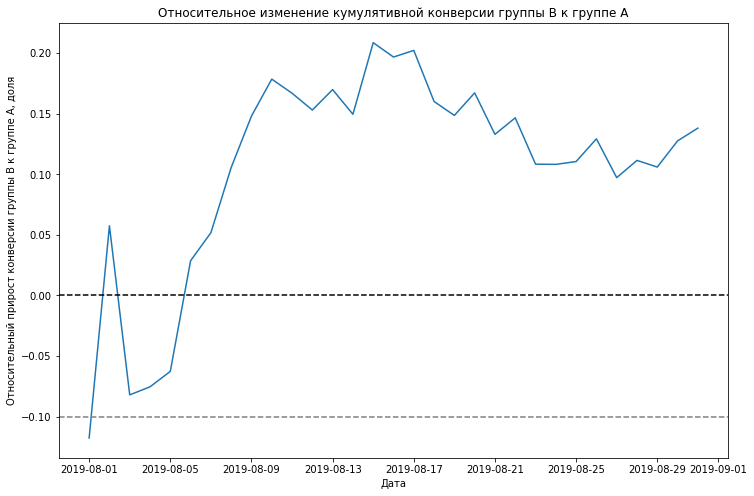

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('Относительное изменение кумулятивной конверсии группы В к группе А')

plt.xlabel('Дата')

plt.ylabel('Относительный прирост конверсии группы В к группе А, доля')


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');

Видим, что кумулятивная конверсия группы В во второй половине месяца стабильно выше, чем в группе А. Посмотрим, как изменятся показатели, если уберем выбросы и аномальные значения.

### Выберем границу для определения аномальных пользователей

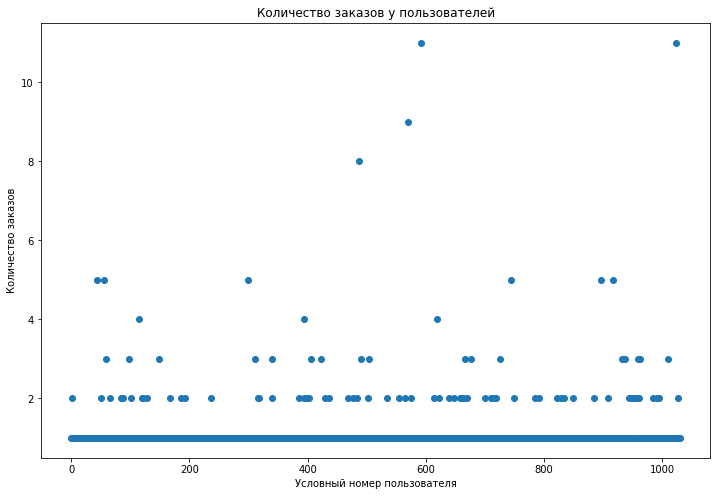

In [ ]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.title('Количество заказов у пользователей')

plt.xlabel('Условный номер пользователя')

plt.ylabel('Количество заказов')

plt.scatter(x_values, ordersByUsers['orders']);

Достаточно много покупателей с 2-мя заказами. С 3-мя и выше уже очень мало. Однако их точная доля не ясна, поэтому высчитаем 95-й и 99-й перцентили. 

In [ ]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Предположим, что аномальные пользователи - те, кто сделал более 4-х заказов.

### Выберем границу для определения аномальных заказов

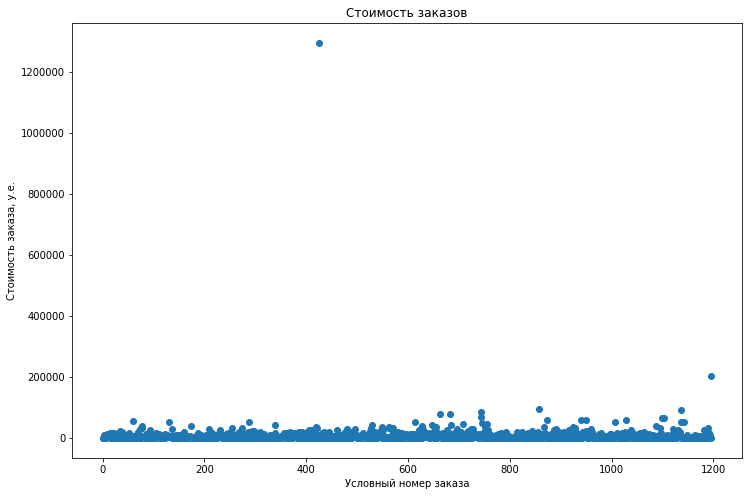

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.title('Стоимость заказов')

plt.xlabel('Условный номер заказа')

plt.ylabel('Стоимость заказа, у.е.')

plt.scatter(x_values, orders['revenue']);

Есть два сверхдорогих заказа. Чтобы точнее установить границу аномальных значений, посчитаем 95-й и 99-й перцентили стоимости заказов.

In [ ]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Здесь тоже возьмем границу в 99-й перцентиль - 58233.2.

## Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

Подготовим таблицу для анализа A/B теста. Посчитаем следующие столбцы:

* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Теперь посчитаем относительный прироста конверсии группы В к группе А.

In [ ]:
# для пользователей из группы А, которые заказали хотя бы 1 раз, найдем число совершенных заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

#для пользователей из группы В, которые заказали хотя бы 1 раз, найдем число совершенных заказов
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

#создадим выборку, где каждый элемент — число заказов определённого пользователя из группы А, в том числе ноль
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#создадим выборку, где каждый элемент — число заказов определённого пользователя из группы В, в том числе ноль
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Относительный прирост конверсии группы B: 0.138


Нулевая гипотеза: статистически значимых различий между группами А и В в конверсии нет. Альтернативная гипотеза: конверсия группы А значимо отличается от конверсии группы В. Пусть alpha = 0.05. Будем использовать mannwhitneyu(), потому что в данных много выбросов.

In [ ]:
stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]

0.016792355056752608

### P-value меньше 0.05, поэтому нулевую гипотезу отвергаем. **Существует статистически значимая разница в конверсии между группами по "сырым данным". Относительный прирост конверсии группы В - 13.8%**.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

* Нулевая гипотеза: нет различий в среднем чеке заказа между группами по "сырым данным". Альтернативная гипотеза: средний чек групп А и В по "сырым данным" значимо различается. Пусть alpha = 0.05. Будем проверять гипотезу с помощью непараметрического теста Манна-Уитни, так как мы не очистили данных от выбросов. Передадим  критерию mannwhitneyu() данные о выручке с заказов.

In [ ]:
stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')[1]

0.7292909855432458

### Нулевую гипотезу подтверждаем, потому что 0.73 > 0.05. Следовательно, различия в среднем чеке по "сырым данным" статистически незначимы.

## Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

Получим датасет abnormalUsers, где будут только те пользователи, которые либо сделали больше 4 заказов, либо потратили на один заказ больше 58233.2. Оба значения - 99-й перцентиль по количеству заказов и чека. Выведем их количество методом shape.

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.shape 

(15,)

Всего таких покупателей - 15. Теперь получим две создадим фильтрованные выборки, без аномальных покупателей.

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [ ]:
sampleBFiltered.mean()/sampleAFiltered.mean()-1

0.15331306791514754

Относительный прирост конверсии в группе В по сравнению с группой А по очищенным данным составил один процентный пункт.

* Нулевая гипотеза: нет различий в конверсии между группами по "очищенным данным". Альтернативная гипотеза: конверсии групп А и В по "очищенным данным" значимо различаются. Пусть alpha = 0.05. Передадим  критерию mannwhitneyu() sampleAFiltered и sampleBFiltered.

In [ ]:
stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]

0.014380135585308014

### Вывод: P-value < 0.05, поэтому гипотезу отвергаем. После очищения данных от аномальных пользователей p-value стал меньше. Следовательно, вывод не меняем - существует статистически значимая разница в конверсии между группами пользователей А и В.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [ ]:
average_checkB = orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
average_checkA = orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
(average_checkB / average_checkA) - 1

-0.005748871952734214

Средний чек по "очищенным" данным снизился на 0,5%.

* Нулевая гипотеза: нет статистически значимого различия в среднем чеке между группами А и В по "очищенным" данным. Альтернативная гипотеза: есть статистически значимое различие в среднем чеке между группами А и В по "очищенным" данным. alpha = 0.05. Передадим mannwhitneyu() "очищенные" данные.

In [ ]:
stats.mannwhitneyu(
            orders[
                np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
    ['revenue'],
            orders[
                np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
    ['revenue'], alternative='two-sided')[1]

0.8509126191381939

Не можем опровергнуть нулевую гипотезу. P-value стало 0.85 против 0.36 на "сырых" данных, то есть различий еще меньше. Следовательно, различий в среднем чеке нет.

### Вывод: статистического значимого отличия в среднем чеке между группами А и В по "очищенным" данным не обнаружено.

## Общие выводы:

### Выводы по приоритизации гипотез: 

Наиболее приоритетные гипотезы по методу ICE:

* Запустить акцию, дающую скидку на товар в день рождения
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Наиболее приоритетные гипотезы по методу RICE:

* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Гипотезе про добавление блоков рекомендаций для повышения конверсии и среднего чека дали, кажется, слишком низкую оценку по Impact, иначе она вошла бы и в приоритетные гипотезы по методу ICE.

### Выводы по A/B-тесту:

* 58 пользователей попали в обе группы. Это может повлиять на результаты теста.
* Конверсия в группе В повысилась на 13% по всем данным и на 15% по данным, откуда удалены пользователи с аномально большим количеством заказов или аномально дорогим заказом. Различия в обеих случаях статистически значимы. Можем сделать вывод, что изменения, которые затронули группу В, положительно повлияли на конверсию.
* Разница в среднем чеке между группами А и В статистически незначимая. Разница между средними чеками в двух группах так мала, что вряд ли она появится, если тест продолжить.
* Останавливаем тест, группа В показывает более высокую конверсию. Разницы между ними по средним чекам нет. Продолжать тест нет смысла, так как разница в конверсии устоялась (это видно по графику кумулятивной конверсии), а разница в средних чеках стремится к нулю что в данных с выбросами, что в данных без них.